In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
sns.set()
import scipy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data = pd.read_csv('/content/india-districts-census-2011 (1).csv')
data.head()

,District code,State name,District name,Population,Male,Female,Literate,Male_Literate,Female_Literate,SC,...,Power_Parity_Rs_90000_150000,Power_Parity_Rs_45000_150000,Power_Parity_Rs_150000_240000,Power_Parity_Rs_240000_330000,Power_Parity_Rs_150000_330000,Power_Parity_Rs_330000_425000,Power_Parity_Rs_425000_545000,Power_Parity_Rs_330000_545000,Power_Parity_Above_Rs_545000,Total_Power_Parity
0,1,JAMMU AND KASHMIR,Kupwara,870354,474190,396164,439654,282823,156831,1048,...,94,588,71,101,172,74,10,84,15,1119
1,2,JAMMU AND KASHMIR,Badgam,753745,398041,355704,335649,207741,127908,368,...,126,562,72,89,161,96,28,124,18,1066
2,3,JAMMU AND KASHMIR,Leh(Ladakh),133487,78971,54516,93770,62834,30936,488,...,46,122,15,22,37,20,14,34,17,242
3,4,JAMMU AND KASHMIR,Kargil,140802,77785,63017,86236,56301,29935,18,...,27,114,12,18,30,19,3,22,7,214
4,5,JAMMU AND KASHMIR,Punch,476835,251899,224936,261724,163333,98391,556,...,78,346,35,50,85,59,8,67,12,629


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Columns: 118 entries, District code to Total_Power_Parity
dtypes: int64(116), object(2)
memory usage: 590.1+ KB


In [ ]:
data.isnull().sum()

District code                    0
State name                       0
District name                    0
Population                       0
Male                             0
                                ..
Power_Parity_Rs_330000_425000    0
Power_Parity_Rs_425000_545000    0
Power_Parity_Rs_330000_545000    0
Power_Parity_Above_Rs_545000     0
Total_Power_Parity               0
Length: 118, dtype: int64

In [ ]:
data.drop(['SC','Male_SC','Female_SC','ST','Male_ST','Female_ST','Male_Workers','Female_Workers','Hindus','Muslims','Christians','Sikhs','Buddhists','Jains','Others_Religions','Religion_Not_Stated','LPG_or_PNG_Households','Households_with_Bicycle','Households_with_Car_Jeep_Van','Households_with_Radio_Transistor','Households_with_Scooter_Motorcycle_Moped','Married_couples_1_Households','Married_couples_2_Households','Married_couples_3_Households','Married_couples_3_or_more_Households','Married_couples_4_Households','Married_couples_5__Households','Married_couples_None_Households','Household_size_1_person_Households','Household_size_2_persons_Households','Household_size_1_to_2_persons','Household_size_3_persons_Households','Household_size_3_to_5_persons_Households','Household_size_4_persons_Households','Household_size_5_persons_Households','Household_size_6_8_persons_Households','Household_size_9_persons_and_above_Households','Location_of_drinking_water_source_Away_Households','Type_of_bathing_facility_Enclosure_without_roof_Households','Type_of_fuel_used_for_cooking_Any_other_Households','Type_of_latrine_facility_Pit_latrine_Households','Type_of_latrine_facility_Other_latrine_Households','Type_of_latrine_facility_Night_soil_disposed_into_open_drain_Households','Type_of_latrine_facility_Flush_pour_flush_latrine_connected_to_other_system_Households','Not_having_bathing_facility_within_the_premises_Total_Households','Not_having_latrine_facility_within_the_premises_Alternative_source_Open_Households','Main_source_of_drinking_water_Un_covered_well_Households','Main_source_of_drinking_water_Handpump_Tubewell_Borewell_Households','Main_source_of_drinking_water_Spring_Households','Main_source_of_drinking_water_River_Canal_Households','Main_source_of_drinking_water_Other_sources_Households','Main_source_of_drinking_water_Other_sources_Spring_River_Canal_Tank_Pond_Lake_Other_sources__Households','Location_of_drinking_water_source_Near_the_premises_Households','Location_of_drinking_water_source_Within_the_premises_Households','Main_source_of_drinking_water_Tank_Pond_Lake_Households','Main_source_of_drinking_water_Tapwater_Households','Main_source_of_drinking_water_Tubewell_Borehole_Households','Condition_of_occupied_census_houses_Dilapidated_Households','Households_with_separate_kitchen_Cooking_inside_house','Having_bathing_facility_Total_Households','Having_latrine_facility_within_the_premises_Total_Households','Ownership_Owned_Households','Ownership_Rented_Households','Households_with_Telephone_Mobile_Phone_Landline_only','Households_with_Telephone_Mobile_Phone_Mobile_only','Households_with_TV_Computer_Laptop_Telephone_mobile_phone_and_Scooter_Car','Households_with_Television','Households_with_Telephone_Mobile_Phone','Households_with_Telephone_Mobile_Phone_Both'
                        ,'Housholds_with_Electric_Lighting'], axis=1, inplace= True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 48 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   District code                    640 non-null    int64 
 1   State name                       640 non-null    object
 2   District name                    640 non-null    object
 3   Population                       640 non-null    int64 
 4   Male                             640 non-null    int64 
 5   Female                           640 non-null    int64 
 6   Literate                         640 non-null    int64 
 7   Male_Literate                    640 non-null    int64 
 8   Female_Literate                  640 non-null    int64 
 9   Workers                          640 non-null    int64 
 10  Main_Workers                     640 non-null    int64 
 11  Marginal_Workers                 640 non-null    int64 
 12  Non_Workers                      640

Unique values in State name: State name
UTTAR PRADESH                  71
MADHYA PRADESH                 50
BIHAR                          38
MAHARASHTRA                    35
RAJASTHAN                      33
TAMIL NADU                     32
KARNATAKA                      30
ORISSA                         30
ASSAM                          27
GUJARAT                        26
JHARKHAND                      24
ANDHRA PRADESH                 23
JAMMU AND KASHMIR              22
HARYANA                        21
PUNJAB                         20
WEST BENGAL                    19
CHHATTISGARH                   18
ARUNACHAL PRADESH              16
KERALA                         14
UTTARAKHAND                    13
HIMACHAL PRADESH               12
NAGALAND                       11
MANIPUR                         9
NCT OF DELHI                    9
MIZORAM                         8
MEGHALAYA                       7
TRIPURA                         4
SIKKIM                          4
PONDICHE

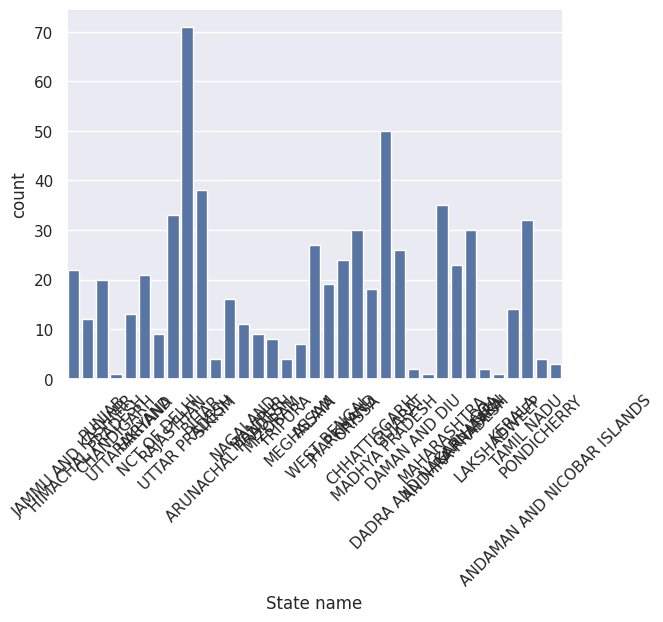

In [ ]:
for col in data.select_dtypes(include=['object']):
    print(f"Unique values in {col}: {data[col].value_counts()}")

# Example for plotting distribution of a categorical feature (State name) with counts
sns.countplot(x="State name", data=data)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.show()

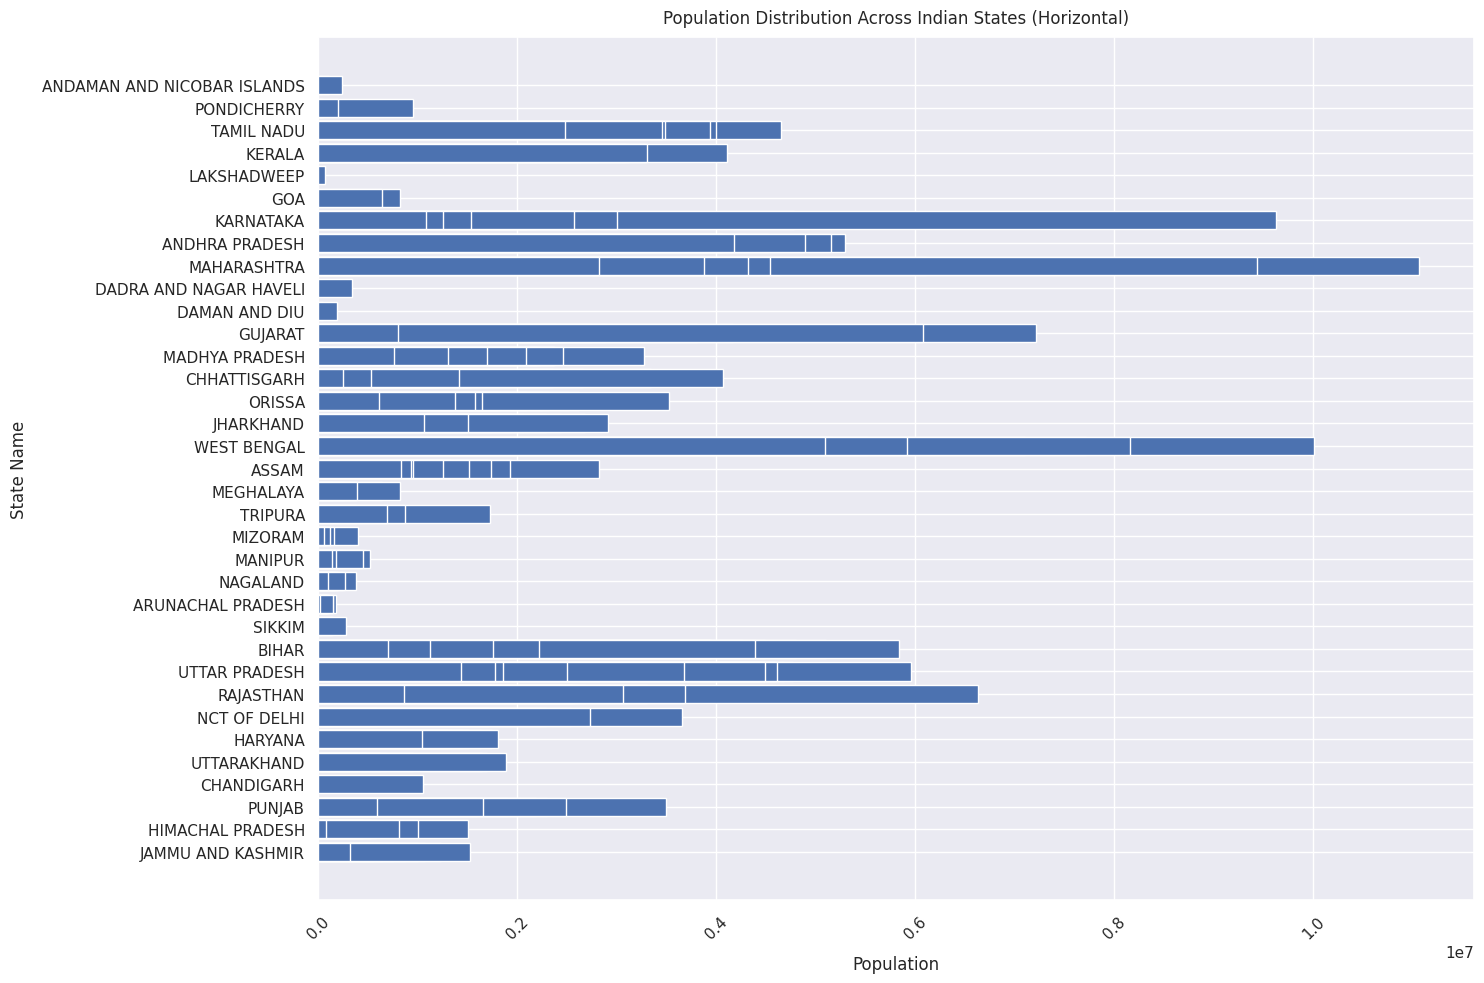

In [ ]:
plt.figure(figsize=(15, 10))

plt.barh(data['State name'], data['Population'])
plt.xlabel('Population', labelpad=10)  # Add padding between label and axis
plt.ylabel('State Name', labelpad=10)  # Add padding between label and axis
plt.title('Population Distribution Across Indian States (Horizontal)', pad=10)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
fig = px.histogram(data,
                   x="State name",
                   y = "Population",
                   title='Population Vs States')
fig.update_layout(bargap=0.1)
fig.show()

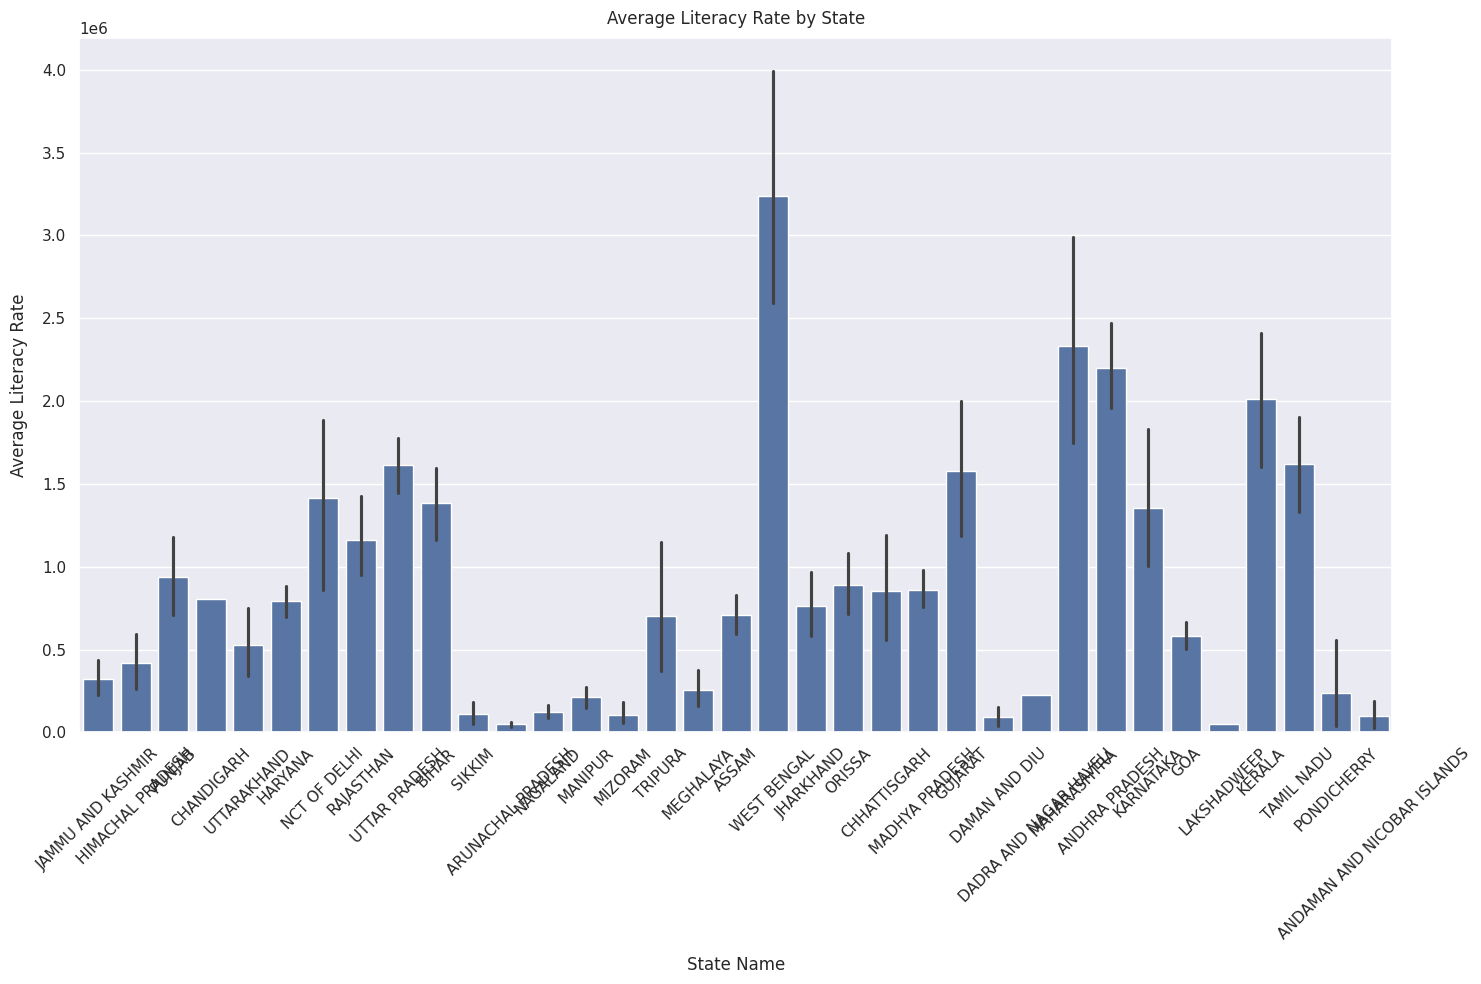

In [ ]:
plt.figure(figsize=(15, 10))

sns.barplot(x="State name", y="Literate", data=data)  # Average literacy per state
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.xlabel('State Name', labelpad=10)  # Add padding between label and axis
plt.ylabel('Average Literacy Rate', labelpad=10)  # Add padding between label and axis
plt.title('Average Literacy Rate by State', pad=10)  # Add padding between title and plot

plt.tight_layout()
plt.show()


In [ ]:
internet_by_state = data.groupby('State name')['Households_with_Internet'].sum().sort_values(ascending=False)

print(internet_by_state)

State name
MAHARASHTRA                    1379351
TAMIL NADU                      772257
KARNATAKA                       638468
UTTAR PRADESH                   609773
NCT OF DELHI                    588951
ANDHRA PRADESH                  549284
KERALA                          483609
WEST BENGAL                     443642
GUJARAT                         381622
PUNJAB                          292111
HARYANA                         248076
RAJASTHAN                       226501
MADHYA PRADESH                  212473
BIHAR                           165521
ORISSA                          135393
ASSAM                           100173
JHARKHAND                        91074
CHHATTISGARH                     67820
UTTARAKHAND                      63032
JAMMU AND KASHMIR                57977
CHANDIGARH                       44283
HIMACHAL PRADESH                 41193
GOA                              41064
PONDICHERRY                      18086
MANIPUR                          10886
TRIPURA       

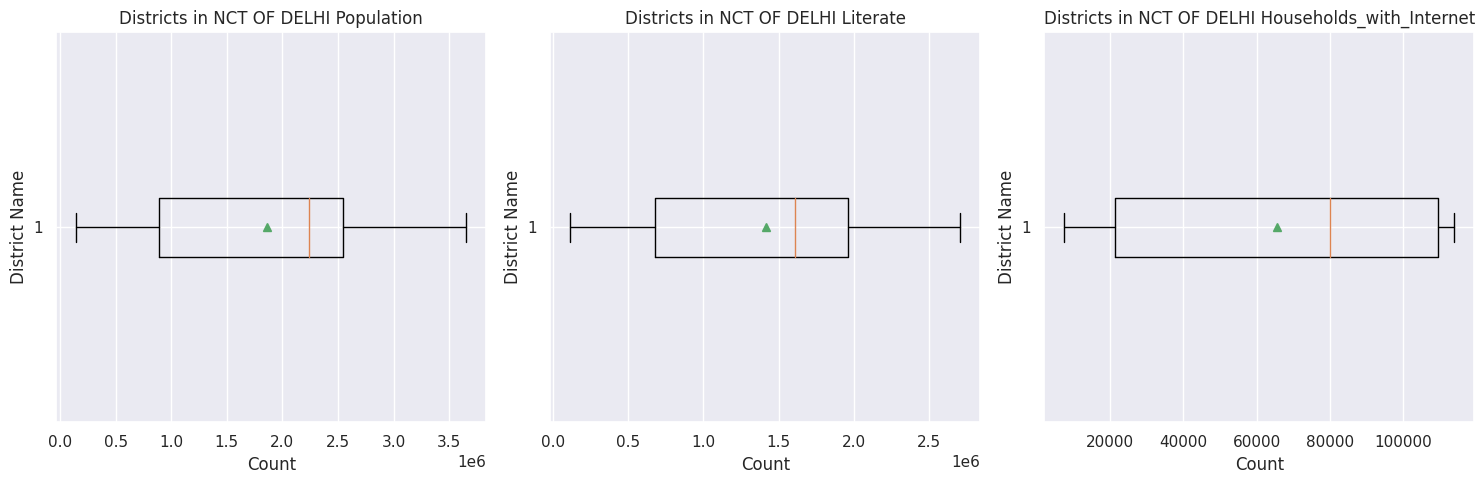

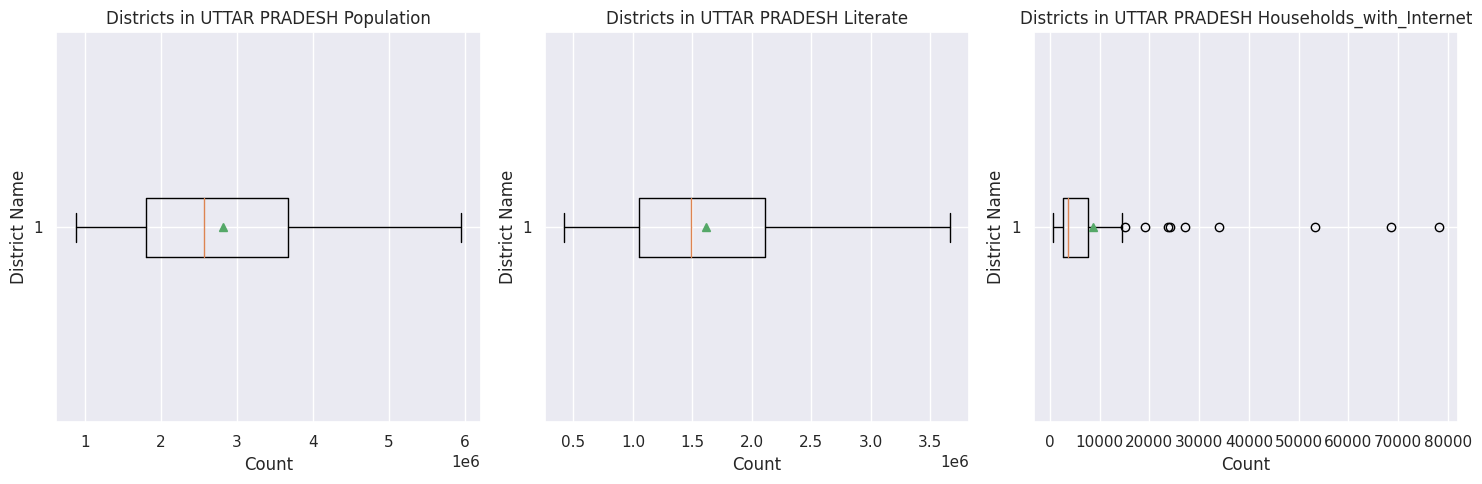

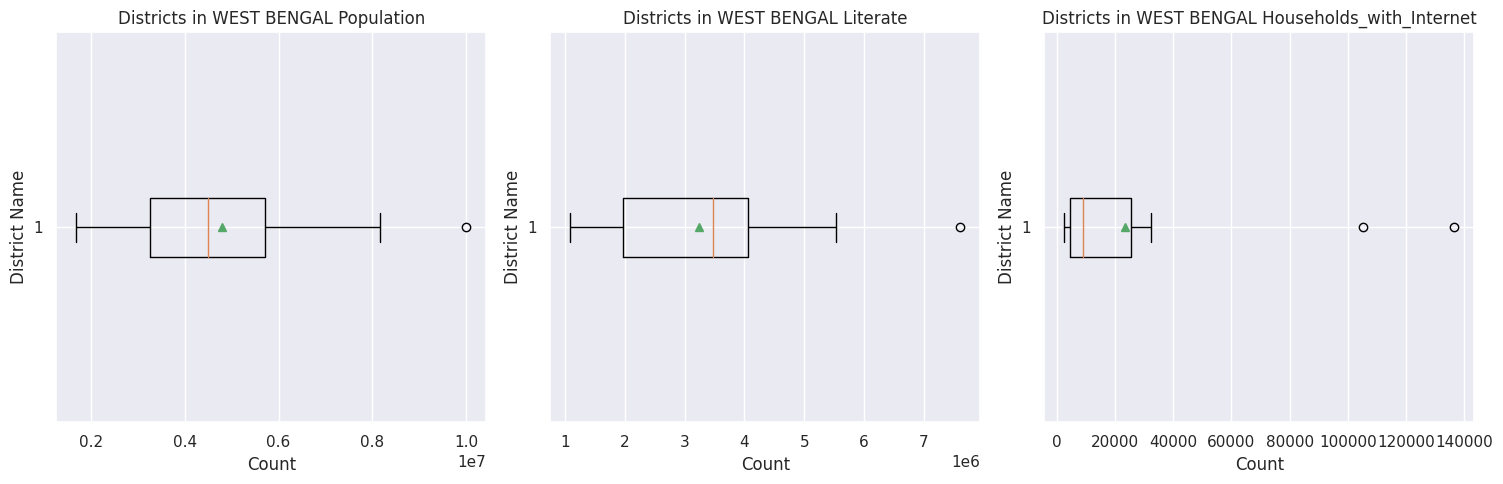

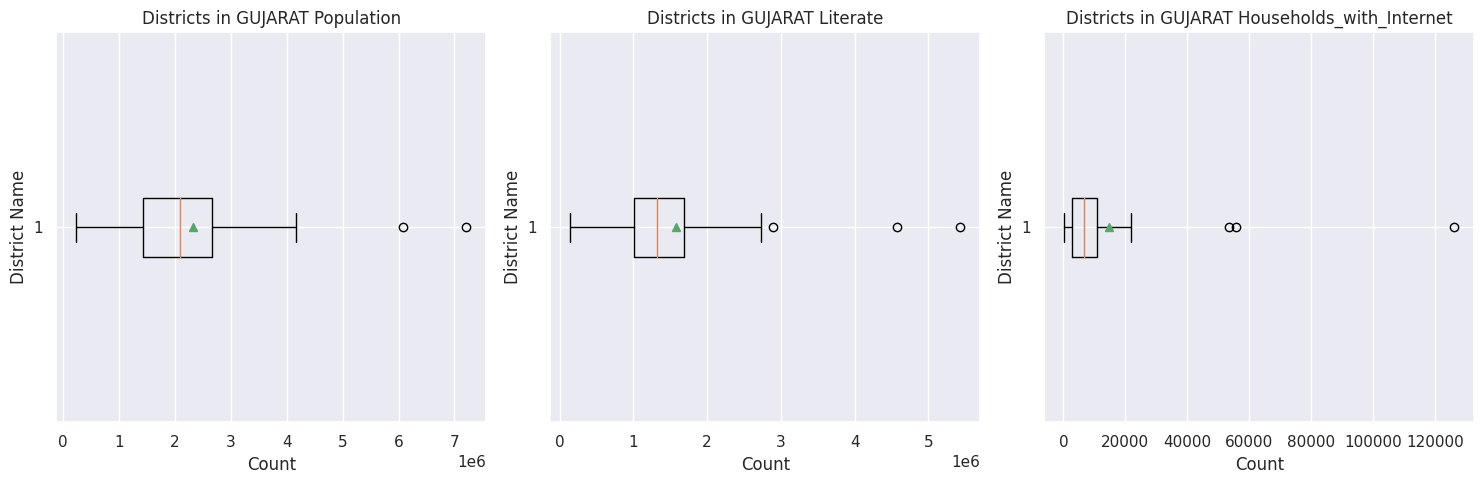

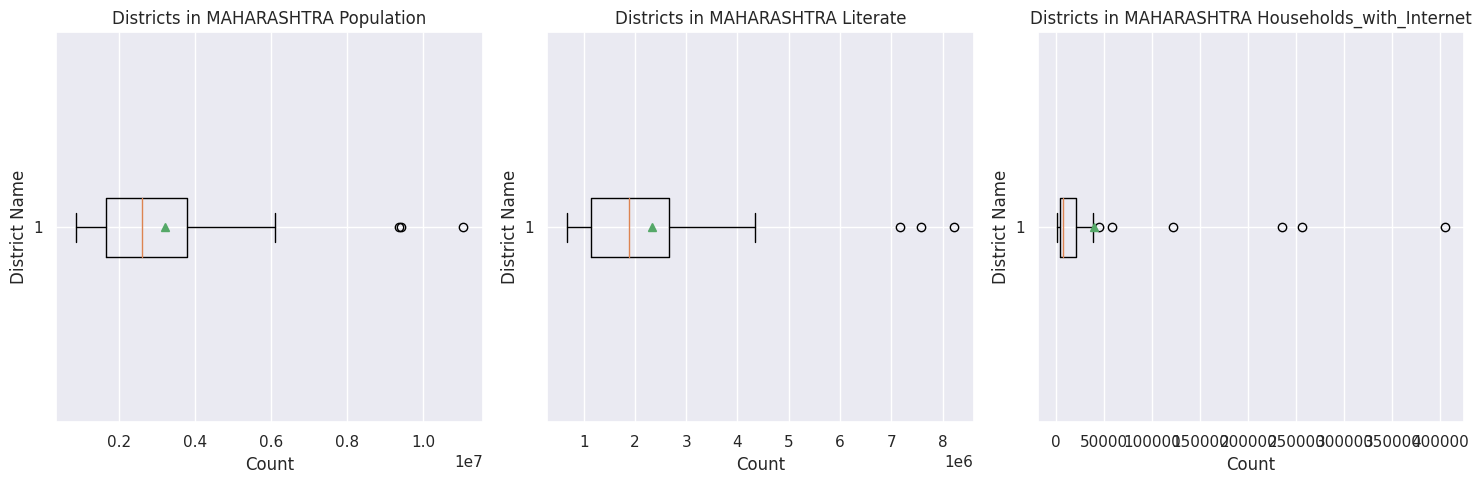

IndexError: single positional indexer is out-of-bounds

In [ ]:
def explore_districts_of(state_df, title_prefix):


  features = ["Population", "Literate", "Households_with_Internet"]
  plot_titles = [f"{title_prefix} {feature}" for feature in features]


  fig, axes = plt.subplots(1, 3, figsize=(15, 5))

  # Create box plots for each feature and district
  for i, feature in enumerate(features):
    axes[i].boxplot(state_df[feature], vert=False, showmeans=True)
    axes[i].set_title(plot_titles[i])
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("District Name")
    axes[i].tick_params(bottom=False)


  plt.tight_layout()
  plt.show()

state_dfs = []

# Create DataFrames for each state
state_dfs.append(data[data['State name'] == "NCT OF DELHI"])
state_dfs.append(data[data['State name'] == "UTTAR PRADESH"])
state_dfs.append(data[data['State name'] == "WEST BENGAL"])
state_dfs.append(data[data['State name'] == "GUJARAT"])
state_dfs.append(data[data['State name'] == "MAHARASHTRA"])
state_dfs.append(data[data['State name'] == "ANDRA PRADESH"])
state_dfs.append(data[data['State name'] == "KARNATAKA"])
state_dfs.append(data[data['State name'] == "KERALA"])
state_dfs.append(data[data['State name'] == "TAMIL NADU"])

# Explore districts for each state
for state_df in state_dfs:
  state_name = state_df["State name"].iloc[0]
  explore_districts_of(state_df.copy(), f"Districts in {state_name}")

In [ ]:
import plotly.express as px

# Assuming your data is stored in a single DataFrame named 'data'

# List to store DataFrames for each state
state_dfs = []

# Create DataFrames for each state based on 'State name' column
for state in ["NCT OF DELHI", "UTTAR PRADESH", "WEST BENGAL", "GUJARAT",
              "MAHARASHTRA", "ANDRA PRADESH", "KARNATAKA", "KERALA",
              "TAMIL NADU"]:
  state_df = data[data['State name'] == state]
  state_dfs.append(state_df)

# Combine data for selected states (optional)
# You can comment out this section if you want to analyze each state individually
states_data = pd.concat(state_dfs, axis=0)

# Visualization 1: Treemap for Population and Internet Penetration
fig = px.treemap(states_data,
                 path=['State name','District name'],
                 values='Population',
                 color='Households_with_Internet',
                 color_continuous_scale='RdBu',
                title = 'Finding out best Market')
fig.update_layout(bargap=1,autosize=False,
    width=800,
    height=800,)
fig.show()

# Visualization 2: Sunburst for Population and Internet Penetration
fig = px.sunburst(states_data,
                 path=['State name','District name'],
                 values='Population',
                 color='Households_with_Internet',
                 color_continuous_scale='RdBu',
                title = 'Finding out best Market')
fig.update_layout(
    autosize=False,
    width=800,
    height=800)
fig.show()

In [ ]:
states_data.drop(['Power_Parity_Less_than_Rs_45000','Power_Parity_Rs_45000_90000','Power_Parity_Rs_90000_150000','Power_Parity_Rs_45000_150000','Power_Parity_Rs_150000_240000','Power_Parity_Rs_240000_330000','Power_Parity_Rs_150000_330000','Power_Parity_Rs_330000_425000','Power_Parity_Rs_425000_545000','Power_Parity_Rs_330000_545000','Power_Parity_Above_Rs_545000','Total_Power_Parity','Male_Literate','Female_Literate','Workers','Main_Workers','Marginal_Workers','Non_Workers','Cultivator_Workers','Agricultural_Workers','Household_Workers','Other_Workers','Below_Primary_Education','Primary_Education','Middle_Education','Secondary_Education','Higher_Education','Graduate_Education','Other_Education','Literate_Education','Illiterate_Education','Total_Education'], axis=1, inplace= True)
states_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 89 to 632
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   District code             236 non-null    int64 
 1   State name                236 non-null    object
 2   District name             236 non-null    object
 3   Population                236 non-null    int64 
 4   Male                      236 non-null    int64 
 5   Female                    236 non-null    int64 
 6   Literate                  236 non-null    int64 
 7   Households_with_Internet  236 non-null    int64 
 8   Households_with_Computer  236 non-null    int64 
 9   Rural_Households          236 non-null    int64 
 10  Urban_Households          236 non-null    int64 
 11  Households                236 non-null    int64 
 12  Age_Group_0_29            236 non-null    int64 
 13  Age_Group_30_49           236 non-null    int64 
 14  Age_Group_50              236 

In [ ]:
LB = LabelEncoder()
states_data['State name'] = LB.fit_transform(states_data['State name'])
states_data['District name'] = LB.fit_transform(states_data['District name'])

# Standardize the data using StandardScaler
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(states_data)

# Convert the scaled data back to a DataFrame with original column names
segmentation_std = pd.DataFrame(segmentation_std, columns=states_data.columns)

# Calculate correlation matrix
correlation_matrix = states_data.corr()

# Print the correlation matrix (optional)
print(correlation_matrix)


                          District code  State name  District name  \
District code                  1.000000   -0.612197       0.148759   
State name                    -0.612197    1.000000      -0.024861   
District name                  0.148759   -0.024861       1.000000   
Population                    -0.109435    0.225088      -0.018842   
Male                          -0.131277    0.228637      -0.022716   
Female                        -0.085212    0.220569      -0.014546   
Literate                       0.019350    0.126919       0.016873   
Households_with_Internet       0.087933   -0.068093       0.028500   
Households_with_Computer       0.085768   -0.022239       0.023705   
Rural_Households              -0.088671    0.312340      -0.018714   
Urban_Households               0.140852   -0.070162       0.055551   
Households                     0.071930    0.102506       0.036755   
Age_Group_0_29                -0.224960    0.277524      -0.047029   
Age_Group_30_49     

In [ ]:
segmentation_std= pd.DataFrame(segmentation_std)
print(segmentation_std.max())

District code               1.231540
State name                  1.345424
District name               1.724727
Population                  4.802058
Male                        4.913040
Female                      4.667023
Literate                    4.993958
Households_with_Internet    8.061502
Households_with_Computer    7.971232
Rural_Households            4.151936
Urban_Households            6.380267
Households                  5.495003
Age_Group_0_29              4.669134
Age_Group_30_49             5.141874
Age_Group_50                5.139723
Age not stated              4.764658
dtype: float64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

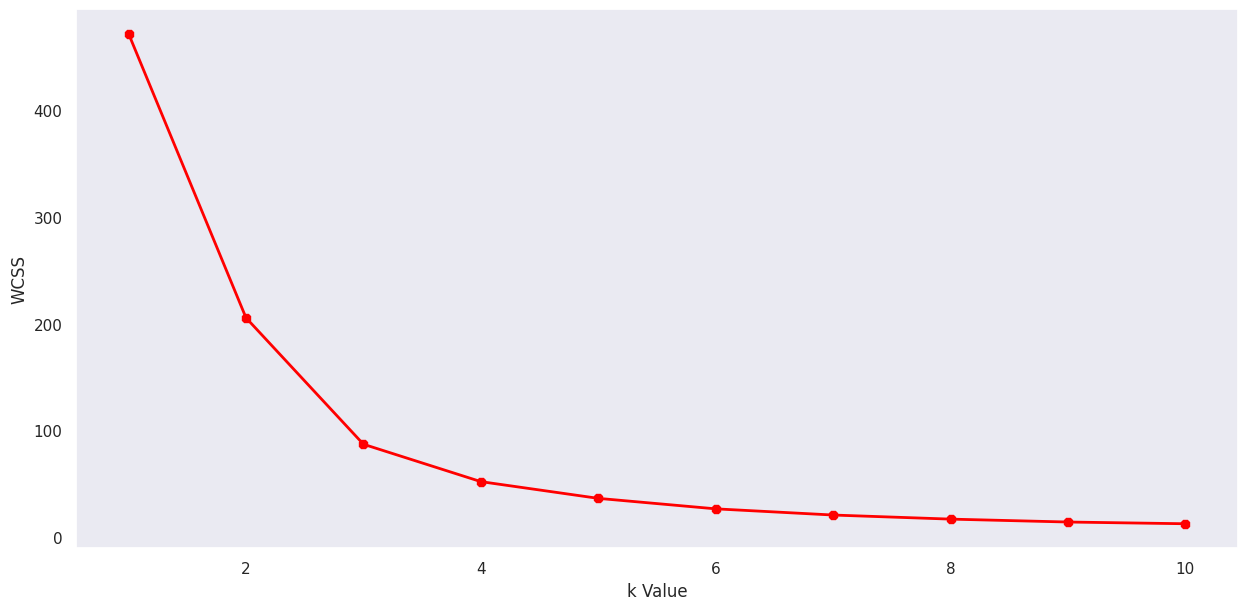

In [ ]:
X1 = segmentation_std.loc[:, ["Population","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

[1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 1 1 0
 1 0 0 0 0 0 0 1 1 0 0 1 1 1 2 1 2 1 1 0 1 1 2 1 1 0 1 0 0 0 0 2 0 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 2 2 1
 0 2 1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 1 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



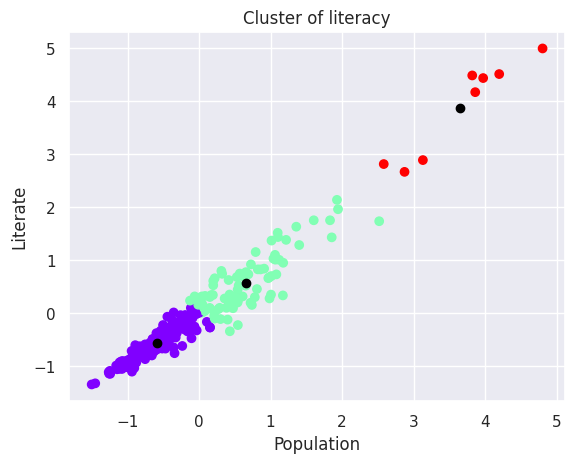

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of literacy')
plt.xlabel('Population')
plt.ylabel('Literate')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

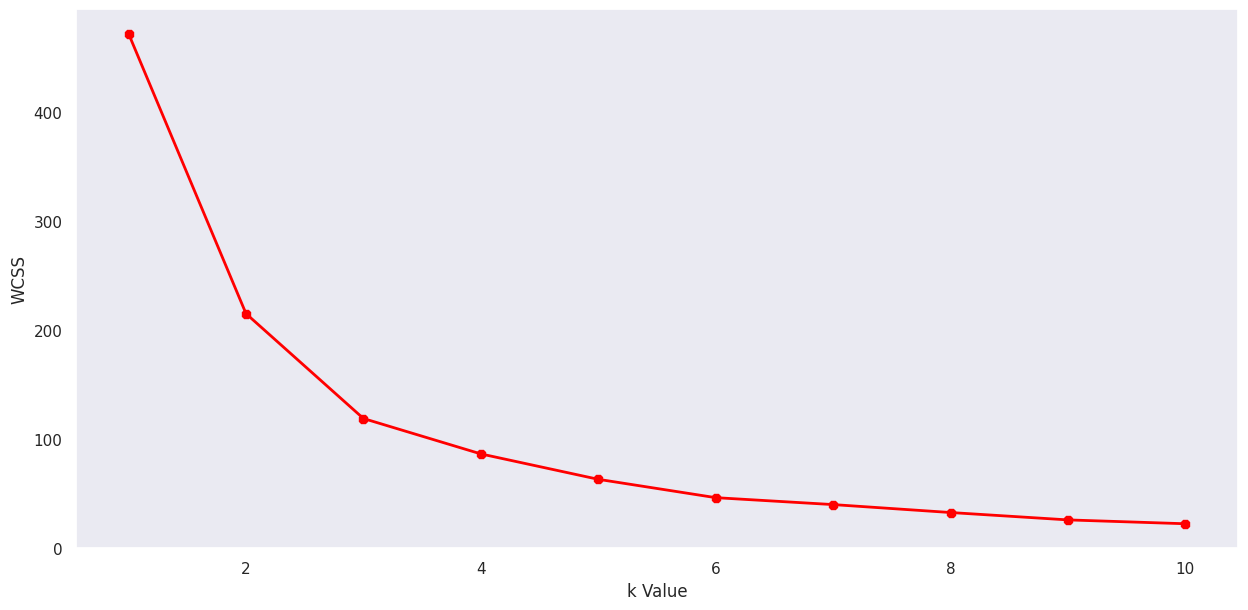

In [ ]:
X1 = segmentation_std.loc[:, ["Households_with_Internet","Literate"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

[2 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 0 2 2 2 2 2 0 0 0 0 0 0 2 0 2 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 1 1 2
 0 1 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
kmeans = KMeans(n_clusters= 3)
label = kmeans.fit_predict(X1)
print(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[2 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 0 2 2 2 2 2 0 0 0 0 0 0 2 0 2 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 2 2 1 1 2
 0 1 2 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 2 2 0 2 2 0 0 0 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0]


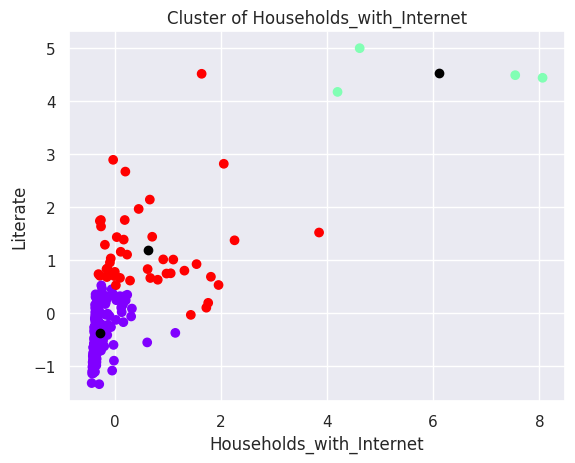

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Cluster of Households_with_Internet')
plt.xlabel('Households_with_Internet')
plt.ylabel('Literate')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

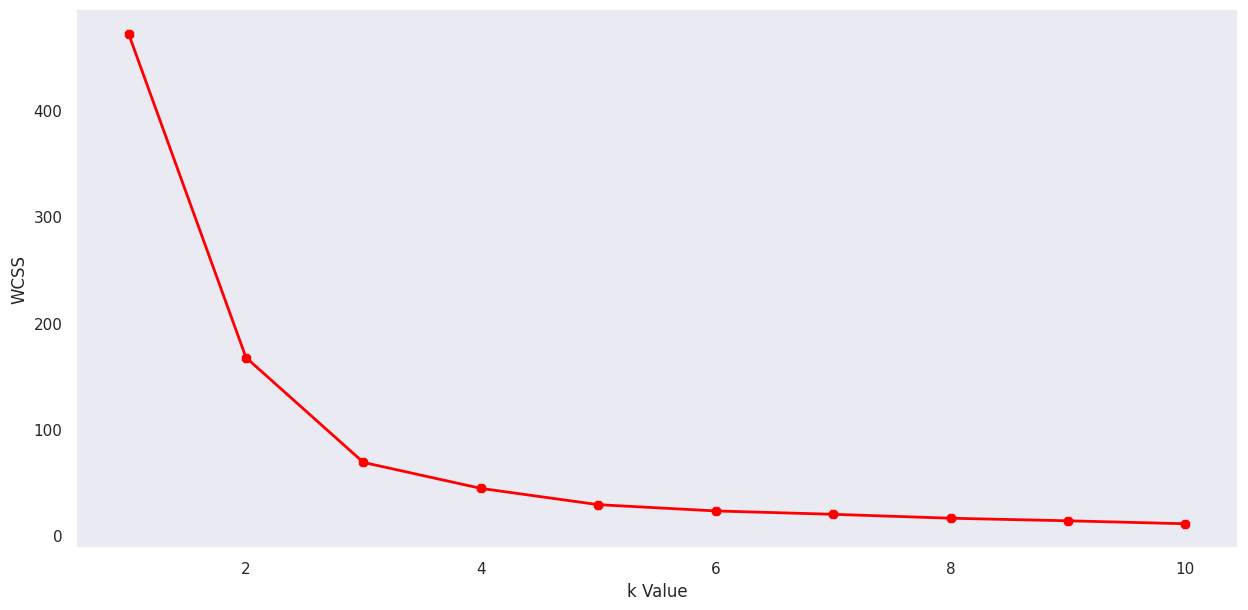

In [ ]:
X1 = segmentation_std.loc[:, ["Urban_Households","Households_with_Computer"]].values

from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(15,7))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color='red', marker="8")
plt.xlabel('k Value')
plt.ylabel('WCSS')

plt.show()

In [ ]:
kmeans = KMeans(n_clusters= 2)
label = kmeans.fit_predict(X1)
print(label)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


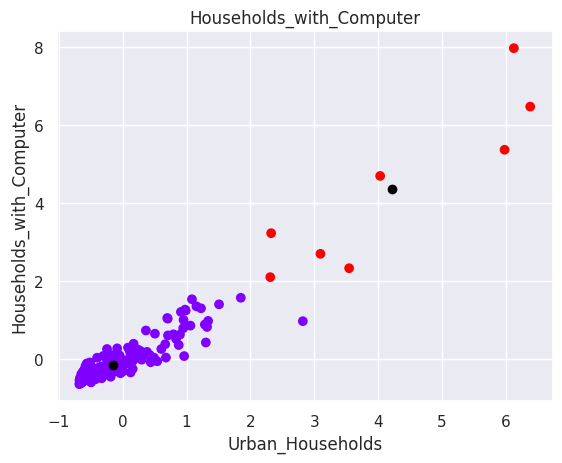

In [ ]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_,cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='black')
plt.title('Households_with_Computer')
plt.xlabel('Urban_Households')
plt.ylabel('Households_with_Computer')
plt.show()

NameError: name 'advance_data' is not defined

<Figure size 1100x1100 with 0 Axes>